In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

In [3]:
# load the dataset from github
df = pd.read_csv("https://raw.githubusercontent.com/harsh21476/Machine-Learning-on-Bank-Marketing-Dataset/master/bank-full.csv", sep = ";")

In [4]:
# display the top 5
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
# check the shape of the dataframe
df.shape

(45211, 17)

In [6]:
# information summary on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Issue: check for missing values

### Remedy: input missing values or drop missing values

In [7]:
# check for missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Issue: check for duplicates

### Remedy: drop duplicates

In [8]:
# get the total number of duplicates
df.duplicated().sum()

0

### Identify outliers

### Remedy: remove outliers

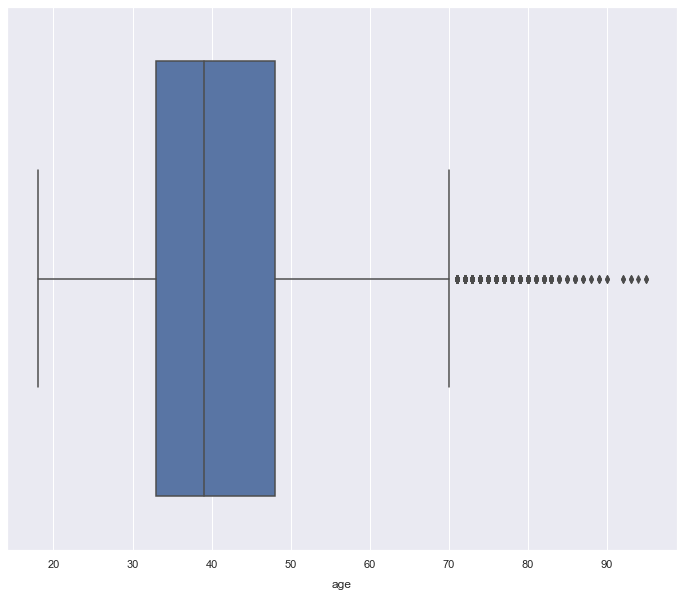

In [9]:
# check for outliers in age column
sns.boxplot(x = df['age'])
plt.show()

In [10]:
# filter off outliers
new_df = df[df['age'] < 70]
new_df.shape

(44657, 17)

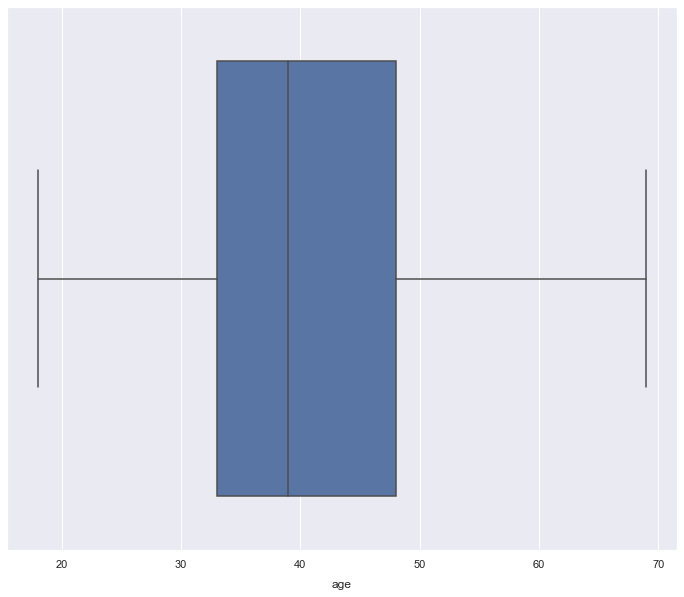

In [11]:
# re-check for outliers presence in age
sns.boxplot(x = new_df['age'])
plt.show()

## Exploratory Data Analysis

### bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

9 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

# other attributes:

10 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

11 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

12 - previous: number of contacts performed before this campaign and for this client (numeric)

13 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

# social and economic context attributes

14 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

### Output variable (desired target):

15 - y - has the client subscribed a term deposit? (binary: 'yes','no')

source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [12]:
# display column names
new_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [13]:
# identify unique categories of contact feature
new_df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [14]:
# do a value count to know how they are represented
new_df.contact.value_counts()

cellular     28971
unknown      13020
telephone     2666
Name: contact, dtype: int64

In [15]:
# identify unique categories of poutcome feature
new_df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [16]:
# do a value count to know how they are represented
new_df.poutcome.value_counts()

unknown    36613
failure     4819
other       1803
success     1422
Name: poutcome, dtype: int64

#### Excercise 1: Print out the unique features of 'y', and do a value count on 'y'

In [17]:
# identify unique categories of y feature
new_df.y.unique()

array(['no', 'yes'], dtype=object)

In [18]:
# do a value count to know how they are represented
new_df.y.value_counts()

no     39603
yes     5054
Name: y, dtype: int64

#### Excercise 2: Printout the unique features of 'marital' and do a value count on 'marital'

In [19]:
# identify unique categories of marital feature
new_df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [20]:
# do a value count to know how they are represented
new_df.marital.value_counts()

married     26795
single      12777
divorced     5085
Name: marital, dtype: int64

In [21]:
# identify unique categories of job feature
new_df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [22]:
# do a value count to know how they are represented
new_df.job.value_counts()

blue-collar      9728
management       9439
technician       7591
admin.           5168
services         4154
retired          1776
self-employed    1573
entrepreneur     1484
unemployed       1303
housemaid        1223
student           938
unknown           280
Name: job, dtype: int64

In [23]:
new_df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
# select features: job, marital, education, default; group 'marital' and 'default' by 'default'
df_marital = new_df[['job', 'marital', 'education', 'default']].groupby(['marital', 'default'])['default'] \
                             .count() \
                             .reset_index(name = 'count') \
                             .sort_values(['count'], ascending = False) \
                             .head(10)
df_marital

,marital,default,count
2,married,no,26347
4,single,no,12538
0,divorced,no,4958
3,married,yes,448
5,single,yes,239
1,divorced,yes,127


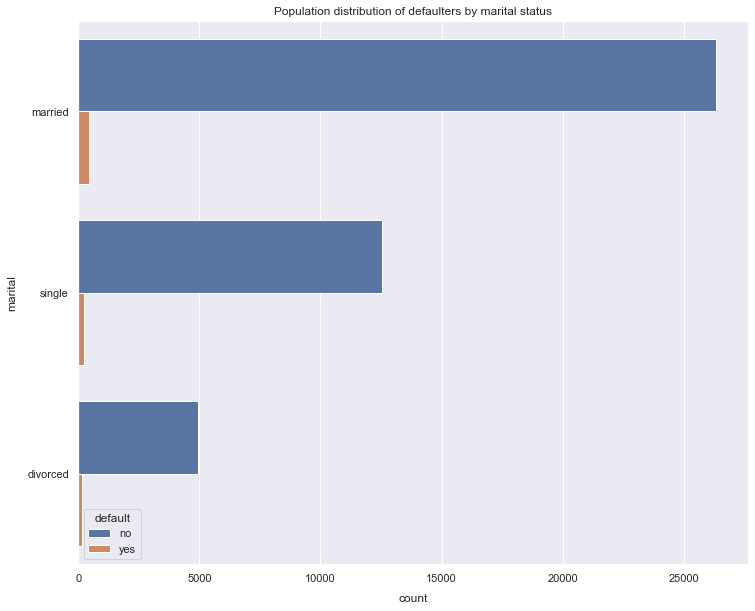

In [25]:
# represent the grouping on multiple bar chart
sns.barplot(x = 'count', y = 'marital', data = df_marital, hue = 'default')
plt.title('Population distribution of defaulters by marital status')
plt.show()

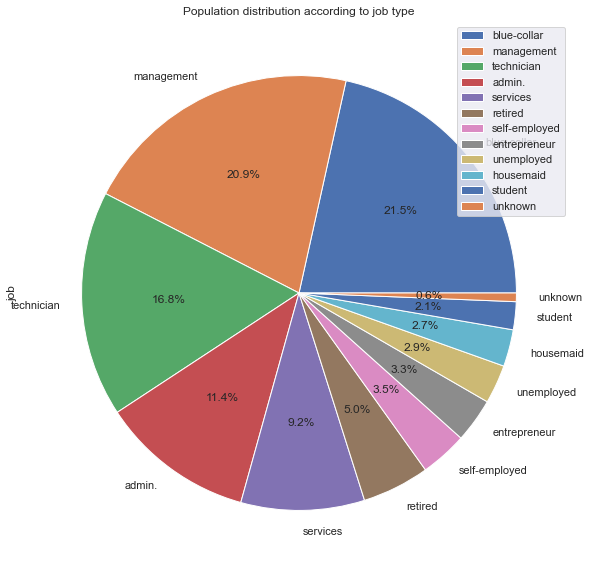

In [26]:
# Visualize the distribution of job feature
pie = df['job'].value_counts().plot(kind = "pie",title = 'Population distribution according to job type', legend = True, autopct = '%1.1f%%')
plt.show()

In [27]:
# select features: job, marital, education, default; group 'job' and 'education' by 'education'
df_edu = new_df[['job', 'marital', 'education', 'default']].groupby(['job', 'education'])['education'] \
                             .count() \
                             .reset_index(name = 'count') \
                             .sort_values(['count'], ascending = False) \
                             .head(10)
df_edu

,job,education,count
18,management,tertiary,7791
5,blue-collar,secondary,5369
37,technician,secondary,5226
1,admin.,secondary,4219
4,blue-collar,primary,3756
29,services,secondary,3457
38,technician,tertiary,1965
17,management,secondary,1117
21,retired,secondary,837
26,self-employed,tertiary,831


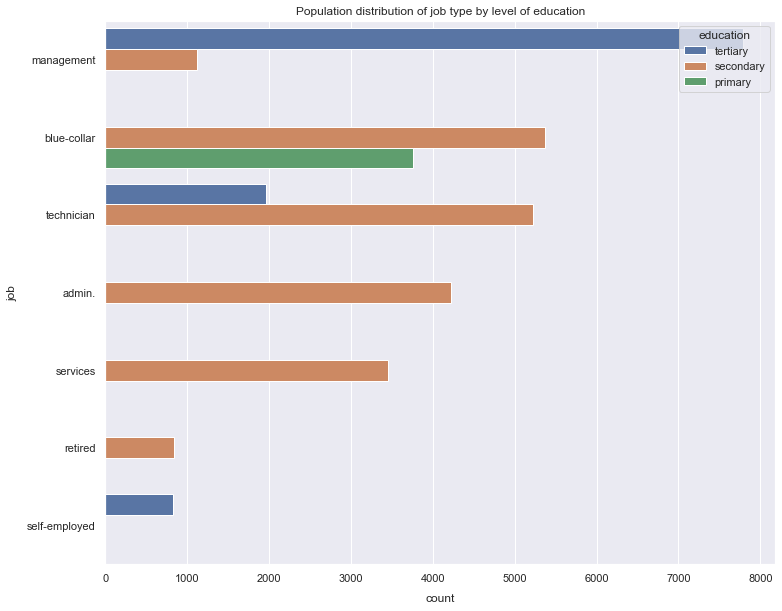

In [28]:
# represent the grouping on multiple bar chart
sns.barplot(x = 'count', y = 'job', data = df_edu, hue = 'education')
plt.title('Population distribution of job type by level of education')
plt.show()

C:\Users\tajag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


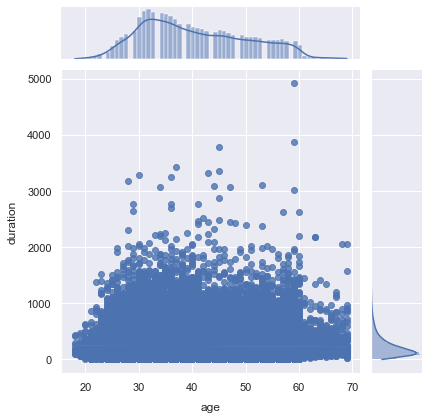

In [29]:
# a joint plot of duration against age
sns.jointplot("age", "duration", data = new_df, kind = 'reg')
plt.show()

#### Excercise 3: Remove the outliers

In [30]:
# Enter your code here. Filter off duration above 2000
new_df = new_df[new_df['duration'] <= 2000]

C:\Users\tajag\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


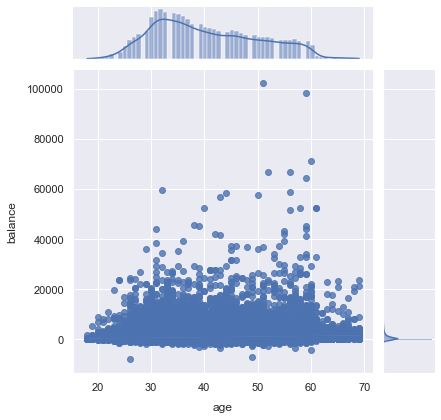

In [31]:
# a joint plot of balance against age
sns.jointplot("age", "balance", data = new_df, kind = 'reg')
plt.show()

#### Excercise 4: Remove outliers from balance

In [32]:
# Filter off balance above 30000
new_df = new_df[new_df['balance'] <= 30000]

### Explore relationship of input features with our target variable

In [33]:
# select features: job, marital, education, default, y; group  'education' and 'y' by 'education'
df_eduy = new_df[['job', 'marital', 'education', 'default', 'y']].groupby(['education', 'y'])['y'] \
                             .count() \
                             .reset_index(name = 'count') \
                             .sort_values(['count'], ascending = False) \
                             .head(10)
df_eduy

,education,y,count
2,secondary,no,20636
4,tertiary,no,11209
0,primary,no,6118
3,secondary,yes,2369
5,tertiary,yes,1944
6,unknown,no,1570
1,primary,yes,475
7,unknown,yes,229


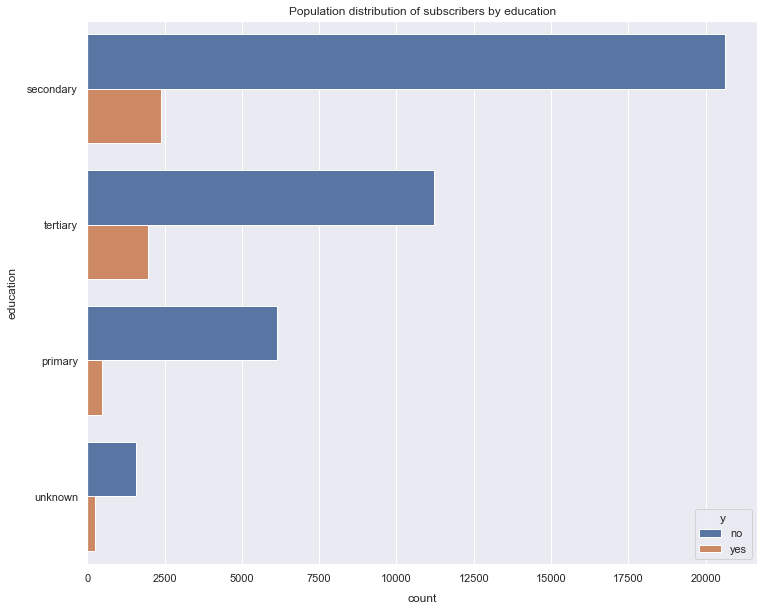

In [34]:
sns.barplot(x = 'count', y = 'education', data = df_eduy, hue = 'y')
plt.title('Population distribution of subscribers by education')
plt.show()

In [35]:
df_joby = new_df[['job', 'marital', 'education', 'default', 'y']].groupby(['job', 'y'])['y'] \
                             .count() \
                             .reset_index(name = 'count') \
                             .sort_values(['count'], ascending = False) \
                             .head(10)
df_joby

,job,y,count
2,blue-collar,no,9009
8,management,no,8125
18,technician,no,6744
0,admin.,no,4533
14,services,no,3782
10,retired,no,1467
12,self-employed,no,1386
4,entrepreneur,no,1356
9,management,yes,1287
6,housemaid,no,1119


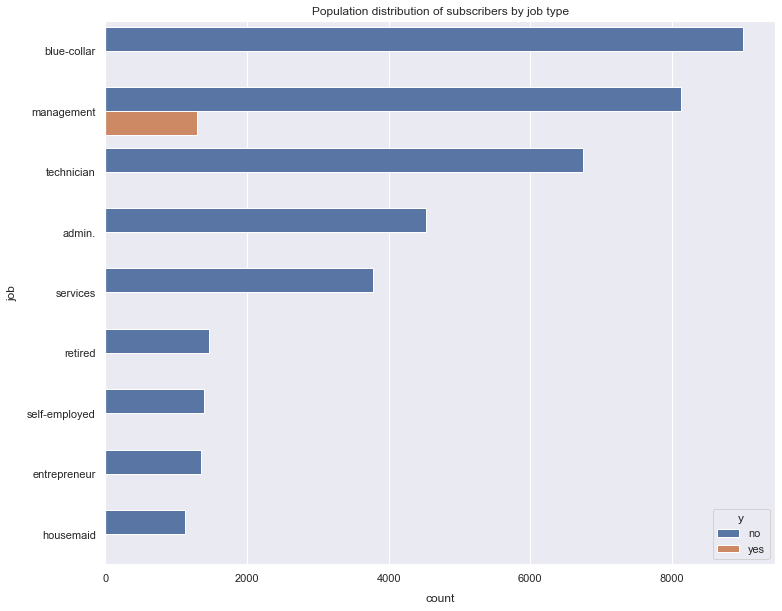

In [36]:
sns.barplot(x = 'count', y = 'job', data = df_joby, hue = 'y')
plt.title('Population distribution of subscribers by job type')
plt.show()

In [37]:
df_maritaly = new_df[['job', 'marital', 'education', 'default', 'y']].groupby(['marital', 'y'])['y'] \
                             .count() \
                             .reset_index(name = 'count') \
                             .sort_values(['count'], ascending = False) \
                             .head(10)
df_maritaly

,marital,y,count
2,married,no,24170
4,single,no,10851
0,divorced,no,4512
3,married,yes,2560
5,single,yes,1896
1,divorced,yes,561


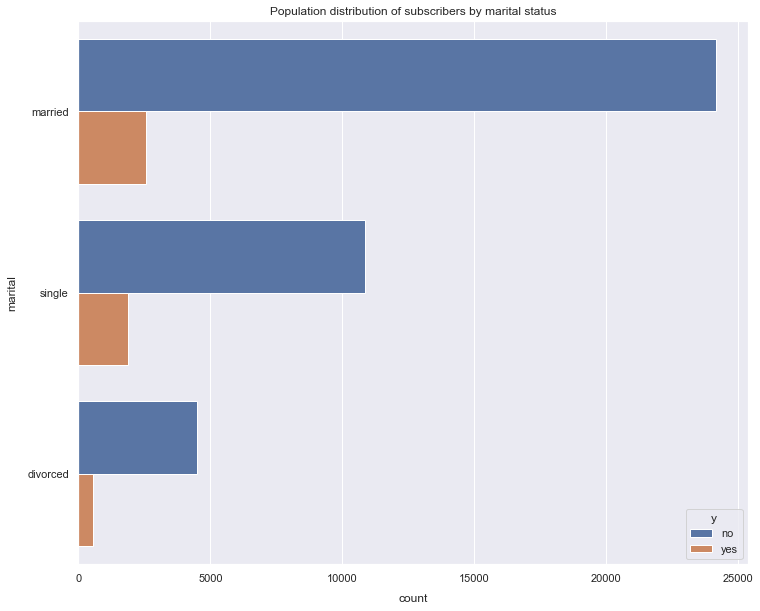

In [38]:
sns.barplot(x = 'count', y = 'marital', data = df_maritaly, hue = 'y')
plt.title('Population distribution of subscribers by marital status')
plt.show()

In [39]:
df_all = new_df[['job', 'marital', 'education', 'default', 'y']].groupby(['job', 'education', 'default', 'y'])['y'] \
                             .count() \
                             .reset_index(name = 'count') \
                             .sort_values(['count'], ascending = False) \
                             .head(10)
df_all

,job,education,default,y,count
63,management,tertiary,no,no,6525
17,blue-collar,secondary,no,no,4824
120,technician,secondary,no,no,4612
2,admin.,secondary,no,no,3649
13,blue-collar,primary,no,no,3466
96,services,secondary,no,no,3101
124,technician,tertiary,no,no,1653
64,management,tertiary,no,yes,1120
59,management,secondary,no,no,991
88,self-employed,tertiary,no,no,682


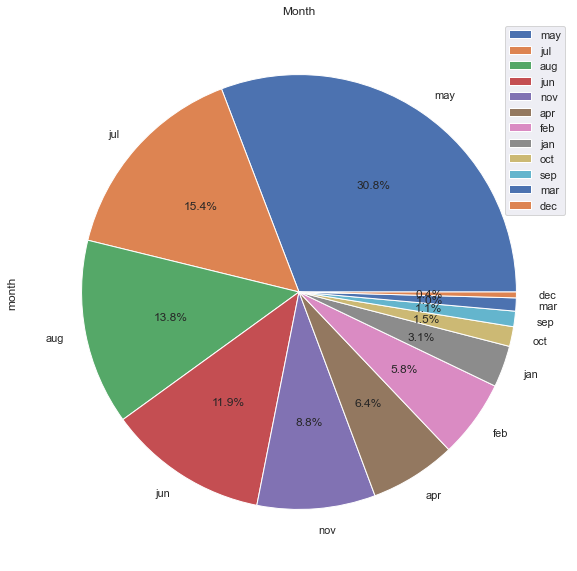

In [40]:
# Visualize using a pie chart to identify most represented month
pie = new_df['month'].value_counts().plot(kind = "pie", title = 'Month', legend = True, autopct = '%1.1f%%')
plt.show()

In [41]:
df_sub = new_df[['job', 'marital', 'education', 'month', 'y']].groupby(['month', 'y'])['y'] \
                             .count() \
                             .reset_index(name = 'count') \
                             .sort_values(['count'], ascending = False) \
                             .head(10)
df_sub

,month,y,count
16,may,no,12815
10,jul,no,6245
2,aug,no,5486
12,jun,no,4774
18,nov,no,3534
0,apr,no,2308
6,feb,no,2169
8,jan,no,1249
17,may,yes,907
3,aug,yes,665


#### Excercise 5: Run the two cells below

In [42]:
# a plot of month against job, with comparism on subscriber's status
sns.catplot(x = "month", y = "job", hue = "y", kind = "bar", data = new_df)

TypeError: Neither the `x` nor `y` variable appears to be numeric.

KeyboardInterrupt: 

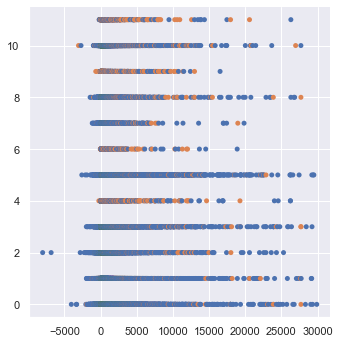

In [43]:
# a plot of balance against month, with comparism on subscriber's status
sns.catplot(x = "balance", y = "month", hue = "y", kind = "swarm", data = new_df)

In [44]:
# Save your dataframe
new_df.to_csv("preprocessed_bank_full.csv", index = False)

### Recommended Reading

https://www.youtube.com/watch?v=03Cv8Fc2-tU&t=3s

https://www.whatissixsigma.net/box-plot-diagram-to-identify-outliers/